In [3]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
from matplotlib import pyplot as plt

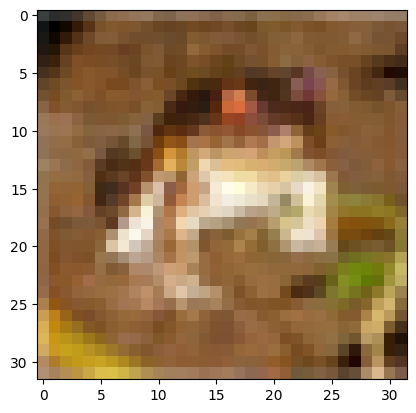

In [9]:
plt.imshow(x_train[0])   # by this we can see what image is

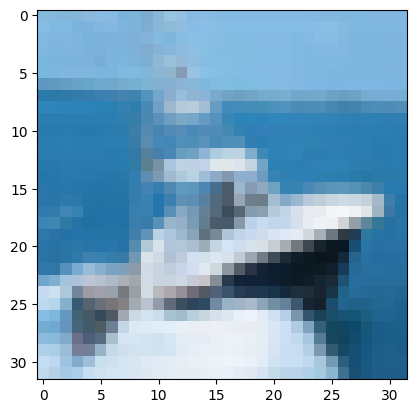

In [10]:
plt.imshow(x_train[8])

In [11]:
y_train[10]

array([4], dtype=uint8)

Build the model now

In [12]:
model = Sequential()
model.add(Conv2D(input_shape=(32,32,3),filters=96,kernel_size=11,strides=4,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))

model.add(Conv2D(filters=256,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))

model.add(Conv2D(filters=384,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))

model.add(Conv2D(filters=256,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))

model.add(Flatten())
model.add(Dense(units=4096,activation='relu'))
model.add(Dropout(0.30))
model.add(Dense(units=4096,activation='relu'))
model.add(Dropout(0.30))
model.add(Dense(units=10,activation='softmax'))


model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 8, 8, 96)       │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 4, 4, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 4, 4, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 2, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 1, 1, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,294,666 (77.42 MB)

 Trainable params: 20,294,666 (77.42 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy']) # the out put is intiger, so have to go with sparse loss

In [14]:
model_train = model.fit(x=x_train,y=y_train,epochs=10,verbose='auto',validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.2041 - loss: 2.1220 - val_accuracy: 0.3635 - val_loss: 1.7521
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4257 - loss: 1.5944 - val_accuracy: 0.4480 - val_loss: 1.5436
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4882 - loss: 1.4273 - val_accuracy: 0.4587 - val_loss: 1.4964
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5337 - loss: 1.3129 - val_accuracy: 0.5178 - val_loss: 1.3622
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5579 - loss: 1.2370 - val_accuracy: 0.5469 - val_loss: 1.2646
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5900 - loss: 1.1584 - val_accuracy: 0.5153 - val_loss: 1.3998
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6115 - loss: 1.0945 - val_accuracy: 0.5688 - val_loss: 1.2155
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6430 - loss: 1

using this model to predict our data

In [15]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5874 - loss: 1.2221


[1.2365179061889648, 0.5817000269889832]

In [20]:
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [22]:
import numpy as np
np.argmax(pred[0])

np.int64(3)

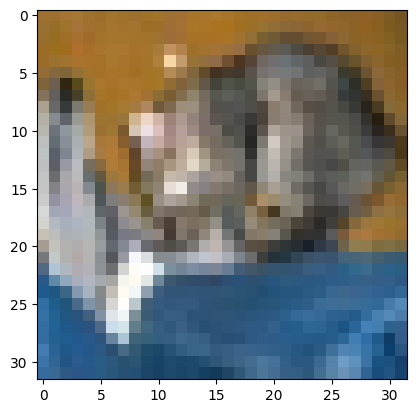

In [23]:
plt.imshow(x_test[0])

In [26]:
y_test[0]  #the model prdicts 3, the result also 3

array([3], dtype=uint8)

In [29]:
x_train = x_train/255  #normalisation
x_test = x_test/255

In [30]:
x_test[0]

array([[[9.52876345e-06, 6.75456649e-06, 2.95512284e-06],
        [9.58907208e-06, 6.69425786e-06, 2.83450558e-06],
        [9.95092385e-06, 6.99580101e-06, 3.07574010e-06],
        ...,
        [8.26228223e-06, 5.72931979e-06, 2.17111066e-06],
        [7.59888731e-06, 5.48808528e-06, 2.17111066e-06],
        [6.99580101e-06, 5.12623350e-06, 1.99018477e-06]],

       [[9.16691167e-06, 6.75456649e-06, 3.07574010e-06],
        [9.10660304e-06, 6.63394924e-06, 2.41234518e-06],
        [9.58907208e-06, 6.87518375e-06, 2.71388832e-06],
        ...,
        [8.20197360e-06, 5.72931979e-06, 1.86956751e-06],
        [7.53857868e-06, 5.48808528e-06, 1.92987614e-06],
        [7.17672690e-06, 5.30715939e-06, 2.05049340e-06]],

       [[9.10660304e-06, 6.63394924e-06, 2.83450558e-06],
        [9.10660304e-06, 6.57364061e-06, 1.99018477e-06],
        [9.52876345e-06, 6.69425786e-06, 2.17111066e-06],
        ...,
        [8.38289949e-06, 5.91024568e-06, 2.05049340e-06],
        [7.84012182e-06, 5.72

In [31]:
model_train_normalised = model.fit(x=x_train,y=y_train,epochs=10,verbose='auto',validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.1014 - loss: 2.3410 - val_accuracy: 0.1000 - val_loss: 2.3029
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0998 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0993 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0984 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.0991 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.0993 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0995 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0990 - loss: 2.

vgg 16

In [32]:
from keras.applications.vgg16 import VGG16

In [59]:
model = VGG16()
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [129]:
from tensorflow.keras.utils import load_img
from keras.applications.imagenet_utils import preprocess_input
import numpy as np

In [155]:
# image = load_img("/content/drive/MyDrive/Colab Notebooks/DL/Day 9 Alexnet/dog.jpg",target_size=(224,224))
image = load_img("/content/drive/MyDrive/Colab Notebooks/DL/Day 9 Alexnet/jelly.jpg",target_size=(224,224))

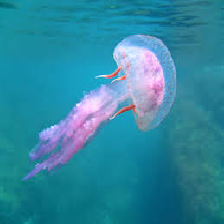

In [157]:
image

In [158]:
image =np.array(image)

In [159]:
image.shape

(224, 224, 3)

In [160]:
image.shape[0]

224

In [161]:
image =image.reshape(1,image.shape[0],image.shape[1],image.shape[2])

In [162]:
image.shape

(1, 224, 224, 3)

In [163]:
image=preprocess_input(image)

In [164]:
image

array([[[[  32.060997 ,   13.221001 , -118.68     ],
         [  33.060997 ,   14.221001 , -117.68     ],
         [  34.060997 ,   15.221001 , -116.68     ],
         ...,
         [  31.060997 ,    7.2210007,  -97.68     ],
         [  31.060997 ,    7.2210007,  -97.68     ],
         [  31.060997 ,    7.2210007,  -97.68     ]],

        [[  33.060997 ,   14.221001 , -111.68     ],
         [  34.060997 ,   15.221001 , -110.68     ],
         [  35.060997 ,   16.221    , -109.68     ],
         ...,
         [  32.060997 ,    7.2210007, -100.68     ],
         [  32.060997 ,    7.2210007, -100.68     ],
         [  32.060997 ,    7.2210007, -100.68     ]],

        [[  13.060997 ,   -6.7789993, -122.68     ],
         [  14.060997 ,   -5.7789993, -121.68     ],
         [  16.060997 ,   -3.7789993, -119.68     ],
         ...,
         [  30.060997 ,    3.2210007, -105.68     ],
         [  30.060997 ,    3.2210007, -105.68     ],
         [  30.060997 ,    3.2210007, -105.68     ]],

In [165]:
pred=model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [166]:
pred

array([[2.67196931e-08, 3.48162007e-06, 2.65605177e-05, 7.38863400e-06,
        8.42858353e-05, 3.37899430e-04, 3.10075557e-05, 1.13000276e-08,
        8.08209855e-09, 1.14420864e-08, 2.54128663e-10, 7.60809582e-10,
        8.03181699e-09, 9.04237074e-10, 7.42716821e-09, 4.63601868e-09,
        1.22301980e-09, 1.29690869e-09, 7.16562698e-10, 9.62819824e-10,
        1.02599849e-08, 8.13371948e-09, 1.20661525e-07, 1.49237579e-07,
        1.80334270e-09, 1.91127469e-09, 1.07407757e-07, 1.64141216e-08,
        1.35974840e-08, 8.95003254e-08, 4.52317828e-09, 8.41622438e-10,
        7.99069788e-09, 2.36959786e-05, 1.34943446e-06, 1.59173368e-08,
        1.30532797e-07, 2.18913598e-09, 7.55153238e-08, 4.10211731e-09,
        5.23403154e-10, 7.05869585e-09, 5.42577205e-10, 1.68848691e-09,
        6.63252475e-09, 2.88646484e-09, 2.02708117e-09, 2.75688006e-09,
        1.14648002e-09, 3.06987964e-08, 1.95416959e-07, 5.97595040e-09,
        2.19154657e-07, 1.04591180e-07, 1.46912003e-08, 8.498075

Decode predictions

In [167]:
from keras.applications.vgg16 import decode_predictions

In [168]:
op=decode_predictions(pred,top=5)

In [169]:
op  # the out put says it is pug, it is a dog

[[('n01910747', 'jellyfish', np.float32(0.99777216)),
  ('n09229709', 'bubble', np.float32(0.00041600093)),
  ('n04251144', 'snorkel', np.float32(0.00041035877)),
  ('n01496331', 'electric_ray', np.float32(0.00033789943)),
  ('n01943899', 'conch', np.float32(0.00013781273))]]